In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
exp1 = pd.DataFrame({'x': [198, 91, 57, 40, 29, 23, 19, 15], 'R': [8, 16, 24, 32, 40, 48, 56, 64]})
exp1['R'] *= 1000

In [227]:
U0 = 3 * 66/150
a = 120
R2 = 10000
R1 = R2 / 2000
R0 = 500

sigma_R = 1
sigma_x = 1
sigma_U = 0.5 / 150 * 3

In [208]:
exp1

,R,x
0,8000,198
1,16000,91
2,24000,57
3,32000,40
4,40000,29
5,48000,23
6,56000,19
7,64000,15


In [228]:
I = U0 * R1 / R2 / (exp1.R + R0)
sigma_I = I * np.sqrt(4 * np.square(sigma_R / exp1.R) + np.square(sigma_U / U0))

In [222]:
I

0    7.764706e-08
1    4.000000e-08
2    2.693878e-08
3    2.030769e-08
4    1.629630e-08
5    1.360825e-08
6    1.168142e-08
7    1.023256e-08
Name: R, dtype: float64

In [212]:
exp1['I'] = I
print(exp1.T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &             0 &             1 &             2 &             3 &             4 &             5 &             6 &             7 \\
\midrule
R &  8.000000e+03 &  1.600000e+04 &  2.400000e+04 &  3.200000e+04 &  4.000000e+04 &  4.800000e+04 &  5.600000e+04 &  6.400000e+04 \\
x &  1.980000e+02 &  9.100000e+01 &  5.700000e+01 &  4.000000e+01 &  2.900000e+01 &  2.300000e+01 &  1.900000e+01 &  1.500000e+01 \\
I &  7.764706e-08 &  4.000000e-08 &  2.693878e-08 &  2.030769e-08 &  1.629630e-08 &  1.360825e-08 &  1.168142e-08 &  1.023256e-08 \\
\bottomrule
\end{tabular}



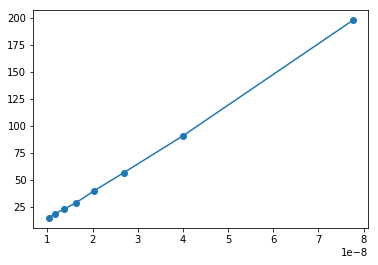

In [213]:
plt.plot(I, exp1.x, marker='o')

In [214]:
slope, intercept, r_value, p_value, std_err = stats.linregress(exp1.x, I)

In [256]:
slope * 2 * a, slope * 2 * a * np.sqrt(np.square(std_err) + np.square(sigma_I / I).mean() + np.square(sigma_x / exp1.x).mean())

(8.837705904416582e-08, 3.398817935861568e-09)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


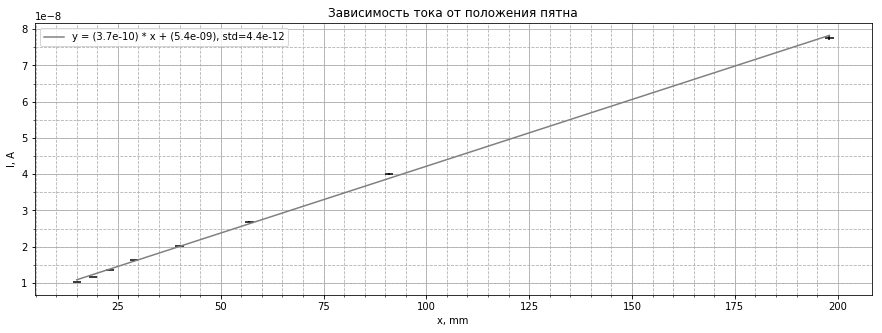

In [253]:
plt.figure(figsize=(15, 5))
# plt.plot(exp1.x, I, marker='o', linestyle='none')
plt.errorbar(exp1.x, I, sigma_I, sigma_x, linestyle='none', color='black', label=None)
plt.grid()
plt.axes().set_xticks(np.arange(0, 200, 5), minor=True)
plt.axes().set_yticks(np.arange(1, 8, 0.5) * 10**(-8), minor=True)
plt.grid(b=True, which='minor', linestyle='--')
plt.plot(exp1.x, exp1.x * slope + intercept, color='gray', 
         label='y = ({0:.2}) * x + ({1:.2}), std={2:.2}'.format(slope, intercept, std_err))
plt.xlabel('x, mm')
plt.ylabel('I, A')
plt.title('Зависимость тока от положения пятна')
plt.legend()
plt.savefig('data/3.2.6/img/fig1.png', format='png')

In [258]:
exp2 = pd.DataFrame({'R': [21, 27, 30, 33, 36, 41, 50], 'x1': [68, 54, 49, 44, 40, 35, 28],
                    'x2': [5, 9, 10, 10, 10, 10, 11]})
exp2.R *= 1000

In [259]:
exp2

,R,x1,x2
0,21000,68,5
1,27000,54,9
2,30000,49,10
3,33000,44,10
4,36000,40,10
5,41000,35,10
6,50000,28,11


In [273]:
Theta = np.log(exp2.x1/exp2.x2)
sigma_Theta = Theta * np.sqrt(np.square(sigma_x / exp2.x1) + np.square(sigma_x / exp2.x2))
exp2['Theta'] = Theta

In [274]:
Theta, sigma_Theta

(0    2.610070
 1    1.791759
 2    1.589235
 3    1.481605
 4    1.386294
 5    1.252763
 6    0.934309
 dtype: float64, 0    0.523423
 1    0.201831
 2    0.162199
 3    0.151939
 4    0.142896
 5    0.130289
 6    0.091257
 dtype: float64)

In [279]:
print(exp2.T.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &            0 &             1 &             2 &             3 &             4 &             5 &             6 \\
\midrule
R     &  21000.00000 &  27000.000000 &  30000.000000 &  33000.000000 &  36000.000000 &  41000.000000 &  50000.000000 \\
x1    &     68.00000 &     54.000000 &     49.000000 &     44.000000 &     40.000000 &     35.000000 &     28.000000 \\
x2    &      5.00000 &      9.000000 &     10.000000 &     10.000000 &     10.000000 &     10.000000 &     11.000000 \\
Theta &      2.61007 &      1.791759 &      1.589235 &      1.481605 &      1.386294 &      1.252763 &      0.934309 \\
\bottomrule
\end{tabular}



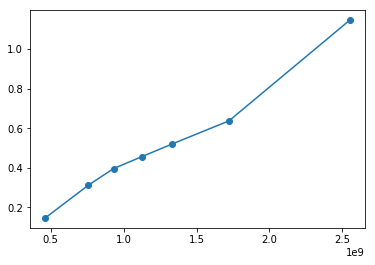

In [278]:
plt.plot(np.square(R0 + exp2.R), 1/np.square(Theta), marker='o')

In [276]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.square(R0 + exp2.R), 1/np.square(Theta))

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


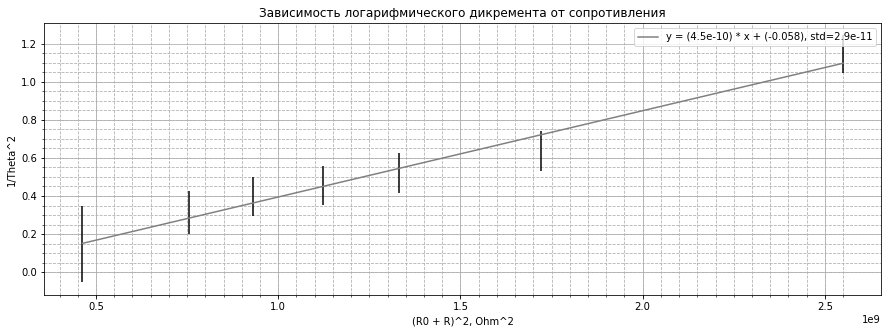

In [277]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.axes().set_xticks(np.arange(0.3, 2.6, 0.05) * 10**9, minor=True)
plt.axes().set_yticks(np.arange(0, 1.2, 0.05), minor=True)
plt.grid(b=True, which='minor', linestyle='--')
# plt.plot(np.square(R0 + exp2.R), 1/np.square(Theta), marker='o', linestyle='none')
plt.errorbar(np.square(R0 + exp2.R), 1/np.square(Theta), sigma_Theta/Theta, sigma_R * (R0 + exp2.R), linestyle='none',
            color='black')
plt.plot(np.square(R0 + exp2.R), np.square(R0 + exp2.R) * slope + intercept, color='gray', 
         label='y = ({0:.2}) * x + ({1:.2}), std={2:.2}'.format(slope, intercept, std_err))
plt.xlabel('(R0 + R)^2, Ohm^2')
plt.ylabel('1/Theta^2')
plt.title('Зависимость логарифмического дикремента от сопротивления')
plt.legend()
plt.savefig('data/3.2.6/img/fig2.png', format='png')

In [285]:
R_cr1 = np.sqrt(1/slope)/2/np.pi - R0
sigma_R_cr1 = R_cr1 * np.sqrt(np.square(sigma_R / exp2.R).mean() + np.square(sigma_R / R0) + np.square(std_err) / 4 +
                             np.square(sigma_Theta / Theta).mean())
R_cr1, sigma_R_cr1

(6978.015225838093, 854.0067920901876)

In [287]:
exp3 = pd.DataFrame({'R': [18, 16, 14, 12, 8, 6, 4, 3, 2.5, 2, 1.5, 1], 
                     'x': [140, 135, 131, 127, 109, 90, 71, 58, 50, 46, 37, 29]})
exp3.R *= 1000
R1 = R2 / 70
C = 2 * 10**(-6)

In [288]:
print(exp3.T.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &       0  &       1  &       2  &       3  &      4  &      5  &      6  &      7  &      8  &      9  &      10 &      11 \\
\midrule
R &  18000.0 &  16000.0 &  14000.0 &  12000.0 &  8000.0 &  6000.0 &  4000.0 &  3000.0 &  2500.0 &  2000.0 &  1500.0 &  1000.0 \\
x &    140.0 &    135.0 &    131.0 &    127.0 &   109.0 &    90.0 &    71.0 &    58.0 &    50.0 &    46.0 &    37.0 &    29.0 \\
\bottomrule
\end{tabular}



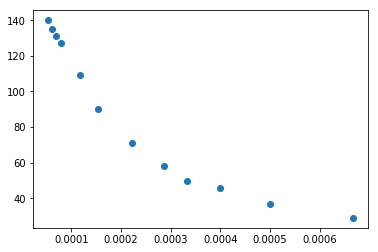

In [178]:
plt.plot(1/(R0 + exp3.R), exp3.x, marker='o', linestyle='none')

In [289]:
l_max = 27
l_cr = l_max / np.exp(1)
l_cr

9.932744911628943

In [290]:
C_cr = 2 * a * R1 / R2 * U0 * C / l_cr
sigma_C_cr = C_cr * np.sqrt(np.square(sigma_R /R1) + np.square(sigma_R / R2) + 
                            np.square(sigma_U / U0) + np.square(sigma_x / l_cr))

In [292]:
C_cr, sigma_C_cr

(9.112716224929372e-07, 9.222447694295481e-08)

In [200]:
l_cr

9.932744911628943

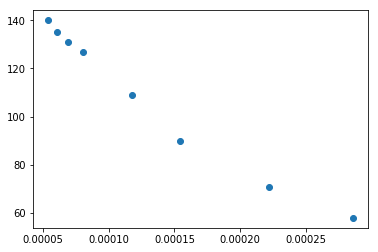

In [293]:
plt.plot(1/(R0 + exp3.R[:8]), exp3.x[:8], marker='o', linestyle='none')

In [294]:
slope, intercept, r_value, p_value, std_err = stats.linregress(1/(R0 + exp3.R[:6]), exp3.x[:6])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


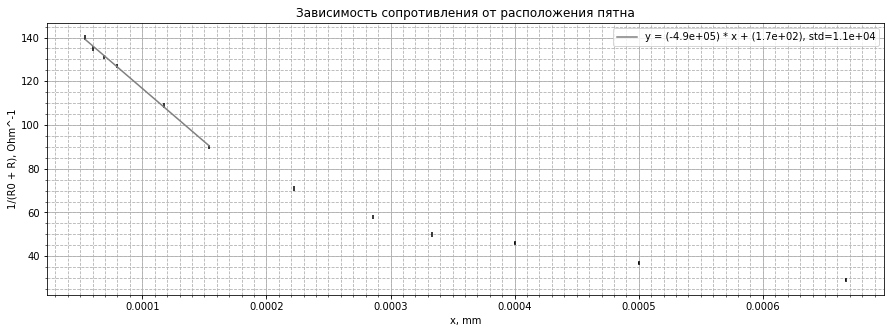

In [300]:
# plt.plot(1/(R0 + exp3.R), exp3.x, marker='o', linestyle='none')
# plt.plot(1/(R0 + exp3.R[:6]), 1/(R0 + exp3.R[:6]) * slope + intercept)
plt.figure(figsize=(15, 5))
plt.grid()
plt.axes().set_xticks(np.arange(0, 0.0007, 0.00001), minor=True)
plt.axes().set_yticks(np.arange(20, 150, 5), minor=True)
plt.grid(b=True, which='minor', linestyle='--')
# plt.plot(np.square(R0 + exp2.R), 1/np.square(Theta), marker='o', linestyle='none')
plt.errorbar(1/(R0 + exp3.R), exp3.x, sigma_x, sigma_R / (R0 + exp3.R) / (R0 + exp3.R), linestyle='none',
            color='black', label=None)
plt.plot(1/(R0 + exp3.R[:6]), 1/(R0 + exp3.R[:6]) * slope + intercept, color='gray', 
         label='y = ({0:.2}) * x + ({1:.2}), std={2:.2}'.format(slope, intercept, std_err))
plt.xlabel('x, mm')
plt.ylabel('1/(R0 + R), Ohm^-1')
plt.title('Зависимость сопротивления от расположения пятна')
plt.legend()
plt.savefig('data/3.2.6/img/fig3.png', format='png')

In [301]:
R_cr = slope/(l_cr*10 - intercept) - R0

In [302]:
R_cr

6867.78547599129

In [303]:
sigma_R_cr = R_cr * np.sqrt(np.square(sigma_x / l_cr) + np.square(std_err / slope))

In [304]:
sigma_R_cr

708.5394129233748